# Practice

## Question 3

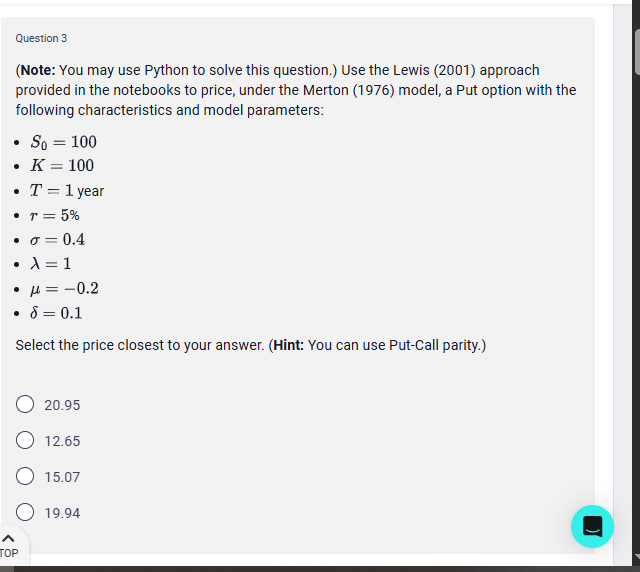

In [22]:
import numpy as np
from scipy.integrate import quad
# Characteristic functions
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Integral part
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value


def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

Under the **Lewis (2001) approach**, the formula for the **call option** price is:

$$
C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
$$

To derive the **put option** price, we use **put-call parity**, which is:

$$
P_0 = C_0 - S_0 + K e^{-rT}
$$

Substituting the expression for $ C_0 $, we get:

$$
P_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4} - S_0 + K e^{-rT}
$$

Simplifying:

$$
P_0 = \frac{K e^{-rT} - \sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
$$

Or more compactly:

$$
P_0 = K e^{-rT} - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
$$

---

### ✅ Python Function for Put Option under Lewis (2001)

We can reuse the **Lewis integration function** used for the call option and adjust it using put-call parity.

#### Step 1: Reuse the Call Option Function

```python
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value
```

#### Step 2: Define the Put Option Function Using Put-Call Parity

```python
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)
```

---

### ✅ Summary

| Type      | Formula                                                                 |
|-----------|-------------------------------------------------------------------------|
| **Call**  | $ C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4} $ |
| **Put**   | $ P_0 = C_0 - S_0 + K e^{-rT} $ (via put-call parity)                |

Let me know if you want a **direct integral-based put pricing function** (without using put-call parity).

In [23]:
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)

S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.4
lamb = 1
mu = -0.2
delta = 0.1

In [24]:
put_price = M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Put Option Price under Lewis approcah: {put_price: .2f}")

Put Option Price under Lewis approcah:  15.07


## Question 4 

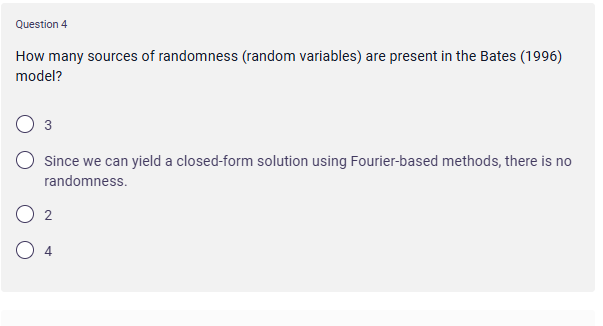

### **Question Analysis:**
The question asks how many sources of randomness (random variables) are present in the Bates (1996) model. To answer this, we need to carefully analyze the structure of the Bates model and identify its stochastic components.

---

### **Step 1: Understanding the Bates (1996) Model**
The Bates (1996) model is a combination of:
1. **Heston (1993) Stochastic Volatility Model**: This introduces stochastic volatility, where the variance ($v_t$) of the underlying asset price follows a mean-reverting process.
2. **Merton (1976) Jump-Diffusion Model**: This introduces jumps in the asset price, modeled as random shocks occurring according to a Poisson process.

Thus, the Bates model combines:
- Stochastic volatility (from Heston).
- Jumps (from Merton).

---

### **Step 2: Identifying Sources of Randomness**
1. **Stochastic Volatility**:
   - In the Heston model, the variance ($v_t$) evolves stochastically over time. This introduces one source of randomness.
   - The dynamics of $v_t$ are driven by a Brownian motion, which is a random variable.

2. **Asset Price Dynamics**:
   - The asset price ($S_t$) follows a diffusion process with stochastic volatility. This introduces another source of randomness.
   - The asset price dynamics are driven by a Brownian motion, independent of the one driving the variance.

3. **Jump Component**:
   - The Merton jump-diffusion component introduces jumps in the asset price.
   - Jumps occur according to a Poisson process, which is a random variable.
   - The size of each jump is also random, typically modeled as a log-normal or normal distribution.

4. **Poisson Process for Jumps**:
   - The number of jumps over a given time period is determined by a Poisson process, which is another source of randomness.

---

### **Step 3: Counting the Sources of Randomness**
From the above analysis, the Bates (1996) model includes the following sources of randomness:
1. **Brownian motion for asset price dynamics**.
2. **Brownian motion for stochastic volatility**.
3. **Poisson process for jump arrivals**.
4. **Random jump sizes**.

Thus, there are **4 sources of randomness** in the Bates (1996) model.

---

### **Step 4: Addressing the Options**
- **Option A (3)**: Incorrect. There are more than three sources of randomness.
- **Option B (No randomness because of Fourier-based methods)**: Incorrect. The presence of Fourier-based methods does not eliminate randomness; it only provides a way to compute option prices efficiently.
- **Option C (2)**: Incorrect. There are more than two sources of randomness.
- **Option D (4)**: Correct. The Bates model includes four distinct sources of randomness.

---

### **Final Answer:**
$$
\boxed{4}
$$

## Quesion 5

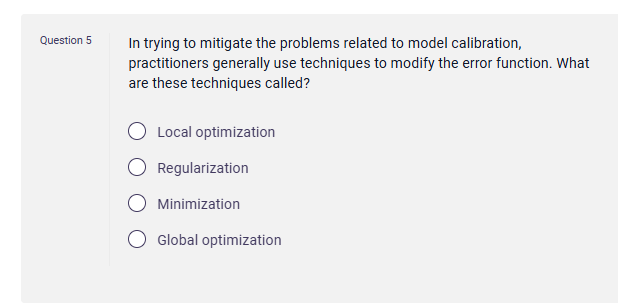

### **Question Analysis:**
The question asks about the techniques practitioners use to mitigate problems related to model calibration by modifying the error function. To answer this, let's break down the key points:

1. **Problems in Model Calibration:**
   - The notes mention two main issues:
     1. Different combinations of parameter values can yield similar values for the error function.
     2. The presence of many local minima in the error function makes it difficult for optimization algorithms to converge to the global minimum.

2. **Solution Approach:**
   - To address these issues, practitioners often use **regularization** techniques. Regularization modifies the error function to stabilize the calibration process and avoid overfitting or unstable parameter estimates.

3. **Regularization in Context:**
   - In the context of Bates (1996) model calibration, the notes explicitly mention **Tikhonov regularization** as a technique to mitigate these problems.
   - Tikhonov regularization introduces a penalty term to the error function, which penalizes deviations from initial parameter values. This helps ensure that the optimization process behaves more stably and avoids large differences from initial values unless strictly necessary.

4. **Other Techniques Mentioned:**
   - **Local Optimization:** Refers to optimization methods that search for the best solution in the vicinity of an initial guess. While useful, it is not a technique to modify the error function itself.
   - **Minimization:** A general term for finding the minimum of a function. It is not a specific technique for modifying the error function.
   - **Global Optimization:** Refers to methods that aim to find the global minimum of a function, but it does not directly involve modifying the error function.

---

### **Step-by-Step Reasoning:**
- The question specifically asks about **techniques to modify the error function**.
- Among the options provided:
  - **Regularization** is the correct choice because it directly involves modifying the error function by adding a penalty term.
  - **Local Optimization**, **Minimization**, and **Global Optimization** are optimization strategies but do not inherently involve modifying the error function.

---

### **Final Answer:**
$$
\boxed{\text{Regularization}}
$$

## Question  6

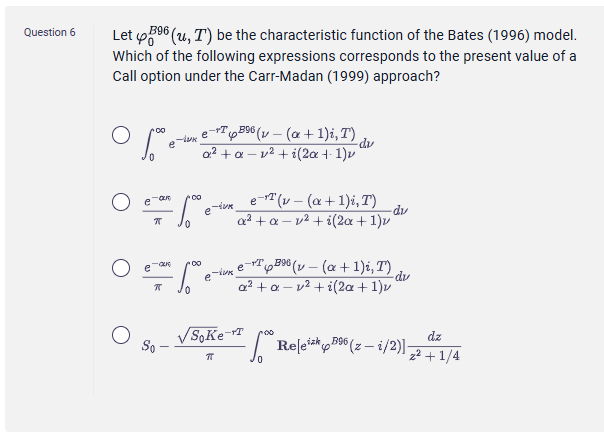

### **Question Analysis:**
The question asks for the expression that corresponds to the present value of a Call option under the **Carr-Madan (1999) approach**. To answer this, we need to recall the key formula used in the Carr-Madan approach for pricing options using Fourier transforms.

---

### **Step 1: Recall the Carr-Madan Formula**
The Carr-Madan (1999) approach provides a way to price European options using the characteristic function of the underlying asset's log-return process. The formula for the price of a Call option is:

$$
C_0 = \frac{e^{-\alpha k}}{\pi} \int_{0}^{\infty} e^{-i\nu k} \frac{e^{-rT} \varphi^{B96}(\nu - (\alpha + 1)i, T)}{\alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu} d\nu
$$

Where:
- $ C_0 $: Present value of the Call option.
- $ S_0 $: Initial stock price.
- $ K $: Strike price.
- $ r $: Risk-free rate.
- $ T $: Time to maturity.
- $ \varphi^{B96}(u, T) $: Characteristic function of the Bates (1996) model.
- $ \alpha $: A parameter chosen to ensure integrability.
- $ k = \ln(K/S_0) $: Log-moneyness.
- $ \nu $: Integration variable.

---

### **Step 2: Match the Formula with the Options**
Now, let’s match the given options with the Carr-Madan formula:

#### **Option A:**
$$
\int_{0}^{\infty} e^{-i\nu k} \frac{e^{-rT} \varphi^{B96}(\nu - (\alpha + 1)i, T)}{\alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu} d\nu
$$
- This option is missing the prefactor $ \frac{e^{-\alpha k}}{\pi} $, which is essential in the Carr-Madan formula. Therefore, it is incorrect.

#### **Option B:**
$$
\frac{e^{-\alpha k}}{\pi} \int_{0}^{\infty} e^{-i\nu k} \frac{e^{-rT} \varphi^{B96}(\nu - (\alpha + 1)i, T)}{\alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu} d\nu
$$
- This option matches the Carr-Madan formula exactly. It includes all the necessary components:
  - The prefactor $ \frac{e^{-\alpha k}}{\pi} $.
  - The exponential term $ e^{-i\nu k} $.
  - The characteristic function $ \varphi^{B96}(\nu - (\alpha + 1)i, T) $.
  - The denominator $ \alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu $.
  - The integration limits from $ 0 $ to $ \infty $.

#### **Option C:**
$$
e^{-\alpha k} \int_{0}^{\infty} e^{-i\nu k} \frac{e^{-rT} \varphi^{B96}(\nu - (\alpha + 1)i, T)}{\alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu} d\nu
$$
- This option is missing the division by $ \pi $ in the prefactor. Therefore, it is incorrect.

#### **Option D:**
$$
S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \text{Re}[e^{izk} \varphi^{B96}(z - i/2)] \frac{dz}{z^2 + 1/4}
$$
- This option corresponds to the **Lewis (2001) approach**, not the Carr-Madan approach. The Lewis formula involves real parts ($ \text{Re} $) and a different integration structure. Therefore, it is incorrect.

---

### **Step 3: Conclusion**
The correct expression for the present value of a Call option under the Carr-Madan (1999) approach is:

$$
\boxed{\frac{e^{-\alpha k}}{\pi} \int_{0}^{\infty} e^{-i\nu k} \frac{e^{-rT} \varphi^{B96}(\nu - (\alpha + 1)i, T)}{\alpha^2 + \alpha - \nu^2 + i(2\alpha + 1)\nu} d\nu}
$$

## Question  7

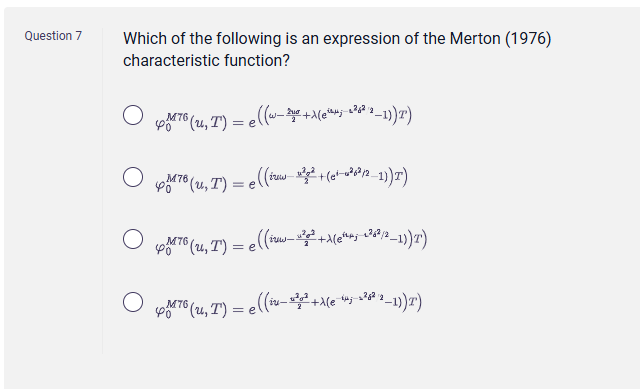

### **Question Analysis:**
The question asks for the correct expression of the **Merton (1976) characteristic function**. To answer this, we need to recall the formula for the Merton (1976) characteristic function and compare it with the given options.

---

### **Step 1: Recall the Merton (1976) Characteristic Function**
The characteristic function of the Merton (1976) jump-diffusion model is given by:

$$
\varphi^{M76}_0(u, T) = e^{\left( \left( i u \omega - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

Where:
- $ u $: The Fourier variable.
- $ T $: Time to maturity.
- $ \omega = r - \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) $: Drift adjustment term.
- $ \sigma $: Volatility of the underlying asset.
- $ \lambda $: Jump intensity.
- $ \mu_j $: Expected jump size.
- $ \delta $: Standard deviation of the jump size.

---

### **Step 2: Analyze Each Option**

#### **Option 1:**
$$
\varphi^{M76}_0(u, T) = e^{\left( \left( \omega - \frac{\sigma u}{2} + \lambda \left( e^{iu_j} - u^2 \delta^2/2 - 1 \right) \right) T \right)}
$$
- This option has several errors:
  - The term $ \omega $ should be multiplied by $ iu $, not just $ \omega $.
  - The diffusion term should be $ -\frac{u^2 \sigma^2}{2} $, not $ -\frac{\sigma u}{2} $.
  - The jump term is incorrectly written as $ e^{iu_j} $ instead of $ e^{i u \mu_j - u^2 \delta^2/2} $.
- **This is incorrect.**

#### **Option 2:**
$$
\varphi^{M76}_0(u, T) = e^{\left( \left( i u \omega - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$
- This option matches the correct formula for the Merton (1976) characteristic function:
  - The drift term is $ i u \omega $.
  - The diffusion term is $ -\frac{u^2 \sigma^2}{2} $.
  - The jump term is correctly written as $ \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) $.
- **This is correct.**

#### **Option 3:**
$$
\varphi^{M76}_0(u, T) = e^{\left( \left( i u \omega - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{i u_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$
- This option has an error in the jump term:
  - The jump term should be $ e^{i u \mu_j - u^2 \delta^2/2} $, not $ e^{i u_j - u^2 \delta^2/2} $.
- **This is incorrect.**

#### **Option 4:**
$$
\varphi^{M76}_0(u, T) = e^{\left( \left( i u - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{-i u_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$
- This option has multiple errors:
  - The drift term should be $ i u \omega $, not just $ i u $.
  - The jump term is incorrectly written as $ e^{-i u_j - u^2 \delta^2/2} $ instead of $ e^{i u \mu_j - u^2 \delta^2/2} $.
- **This is incorrect.**

---

### **Step 3: Conclusion**
The correct expression for the Merton (1976) characteristic function is given in **Option 2**:

$$
\varphi^{M76}_0(u, T) = e^{\left( \left( i u \omega - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

---

### **Final Answer:**
$$
\boxed{2}
$$

## Question  8

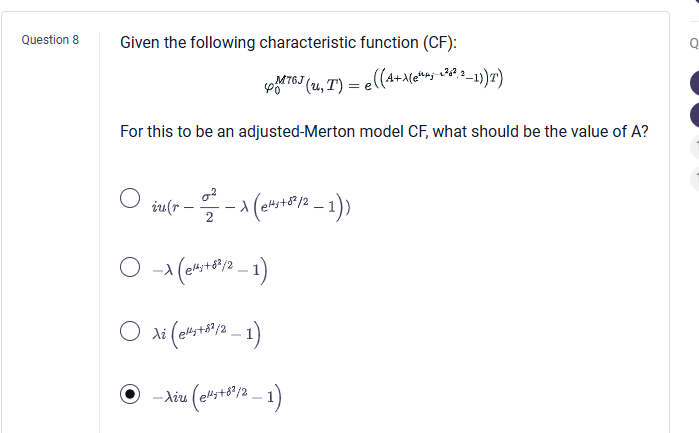

### **Question Analysis:**
The question asks us to determine the correct value of $ A $ in the adjusted Merton model characteristic function (CF). The given characteristic function is:

$$
\varphi^{M76J}_0(u, T) = e^{\left( \left( A + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

We need to identify the correct expression for $ A $ based on the structure of the adjusted Merton model.

---

### **Step 1: Recall the Adjusted Merton Model Characteristic Function**
The adjusted Merton model characteristic function (only jump component) is given by:

$$
\varphi^{M76J}_0(u, T) = e^{\left( \left( i u \omega + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

Where:
- $ \omega = -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) $: Drift adjustment term due to jumps.
- $ \lambda $: Jump intensity.
- $ \mu_j $: Expected jump size.
- $ \delta $: Standard deviation of the jump size.

---

### **Step 2: Compare with the Given CF**
The given characteristic function is:

$$
\varphi^{M76J}_0(u, T) = e^{\left( \left( A + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

From this, we can see that the term $ A $ corresponds to the drift adjustment term $ i u \omega $. Substituting $ \omega = -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) $, we get:

$$
A = i u \omega = i u \left( -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) \right)
$$

Simplifying:

$$
A = -\lambda i u \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$

---

### **Step 3: Match with the Options**
Now, let’s match this expression with the provided options:

#### **Option A:**
$$
iu \left( r - \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) \right)
$$
- This option includes terms related to the risk-free rate ($ r $) and volatility ($ \sigma $), which are not part of the adjusted Merton model characteristic function. Therefore, it is incorrect.

#### **Option B:**
$$
-\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option lacks the factor $ i u $, which is essential in the characteristic function. Therefore, it is incorrect.

#### **Option C:**
$$
\lambda i \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option has the wrong sign for $ \lambda $ and does not include the factor $ i u $. Therefore, it is incorrect.

#### **Option D:**
$$
-\lambda i u \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option matches exactly with the derived expression for $ A $. Therefore, it is correct.

---

### **Final Answer:**
The correct value of $ A $ is:

$$
\boxed{D}
$$

## Question 9

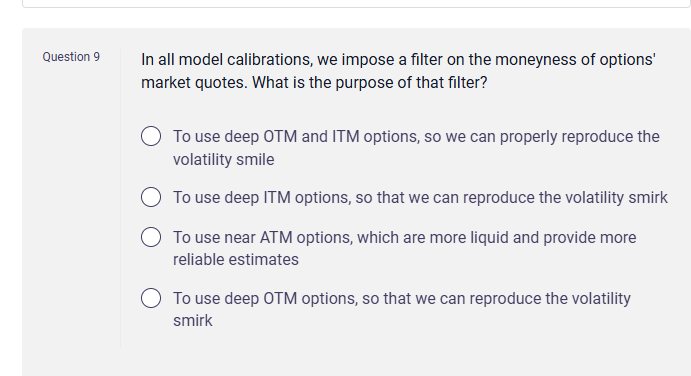

### **Question Analysis:**
The question asks about the purpose of imposing a filter on the moneyness of options' market quotes during model calibrations. To answer this, let's break down the key points:

1. **Moneyness**: Moneyness is a measure of how in-the-money (ITM), at-the-money (ATM), or out-of-the-money (OTM) an option is. It is typically defined as:
   $$
   \text{Moneyness} = \frac{\text{Strike Price}}{\text{Underlying Asset Price}}
   $$

2. **Purpose of Filtering Moneyness**:
   - During model calibration, practitioners often filter options based on their moneyness to focus on specific types of options that provide the most reliable and relevant information for the calibration process.
   - The choice of which options to use depends on the goal of the calibration.

3. **Key Considerations**:
   - **Deep OTM/ITM Options**: These options are less liquid and have higher bid-ask spreads, making them less reliable for calibration.
   - **Near ATM Options**: These options are more liquid and have tighter bid-ask spreads, providing more reliable estimates for volatility and other parameters.
   - **Volatility Smile/Smirk**: The volatility smile refers to the pattern of implied volatilities across different strike prices. Reproducing the volatility smile requires using a range of options, not just ATM options.

---

### **Step 1: Analyze Each Option**

#### **Option A: "To use deep OTM and ITM options, so we can properly reproduce the volatility smile"**
- Deep OTM and ITM options are less liquid and have higher bid-ask spreads, making them less reliable for calibration.
- While these options are important for capturing the full shape of the volatility smile, they are not the primary focus when filtering for moneyness.
- **This is incorrect.**

#### **Option B: "To use deep ITM options, so that we can reproduce the volatility smirk"**
- Deep ITM options are even less liquid than deep OTM options and are not typically used for reproducing the volatility smirk.
- The volatility smirk refers to the asymmetry in implied volatilities between OTM calls and puts, which is better captured using near ATM options.
- **This is incorrect.**

#### **Option C: "To use near ATM options, which are more liquid and provide more reliable estimates"**
- Near ATM options are highly liquid and have tight bid-ask spreads, making them more reliable for estimating model parameters.
- Calibration often focuses on near ATM options because they provide stable and accurate data for parameter estimation.
- **This is correct.**

#### **Option D: "To use deep OTM options, so that we can reproduce the volatility smirk"**
- Deep OTM options are less liquid and have higher bid-ask spreads, making them less reliable for calibration.
- While deep OTM options are important for capturing the full shape of the volatility smirk, they are not the primary focus when filtering for moneyness.
- **This is incorrect.**

---

### **Step 2: Conclusion**
The purpose of imposing a filter on the moneyness of options' market quotes is to use **near ATM options**, which are more liquid and provide more reliable estimates for model calibration.

---

### **Final Answer:**
$$
\boxed{\text{C}}
$$

## Question 10

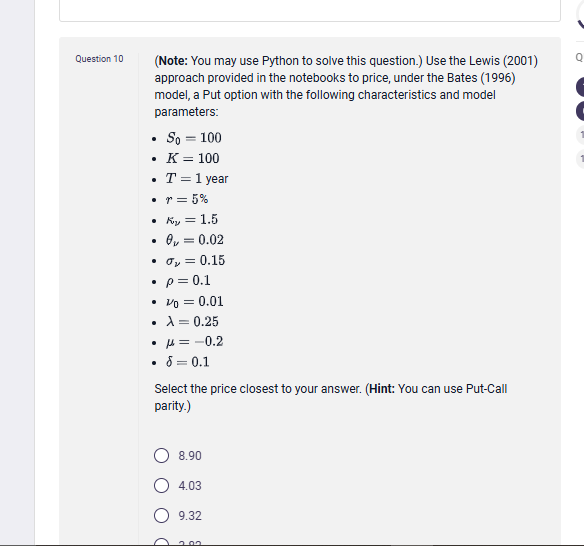

In [25]:
## Characteristic fucntion

def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value


def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def B96_Put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price




In [26]:
# General Parameters
S0 = 100
K = 100
T = 1
r = 0.05

# Heston'93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

# Merton'76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)

put_price = B96_Put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

print(f"Put price: {put_price:.2f}")

Put price: 4.03


## Question 11

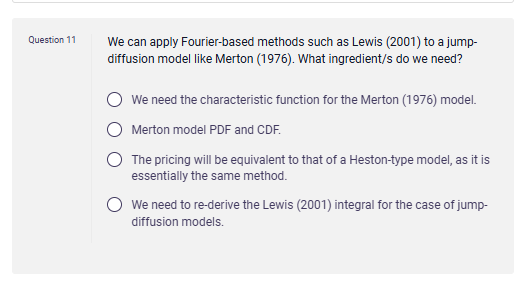

### **Question Analysis:**
The question asks about applying Fourier-based methods, such as the Lewis (2001) approach, to a jump-diffusion model like the Merton (1976) model. The goal is to determine what ingredients are necessary for this application.

#### **Key Points from the Question:**
1. **Fourier-Based Methods**: Techniques like the Lewis (2001) approach use characteristic functions to price options.
2. **Jump-Diffusion Model**: The Merton (1976) model combines geometric Brownian motion with jumps.
3. **Ingredients Needed**: The question asks what specific components are required to apply Fourier-based methods to a jump-diffusion model.

---

### **Step 1: Understanding the Lewis (2001) Approach**
The Lewis (2001) approach is a Fourier-based method for pricing European options. It relies on the characteristic function of the underlying asset's log-return process. The general formula for the call option price under Lewis (2001) is:

$$
C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
$$

Where:
- $ \varphi(u, T) $: Characteristic function of the log-return process.
- $ k = \ln(S_0 / K) $: Log-moneyness.
- $ S_0 $: Initial stock price.
- $ K $: Strike price.
- $ r $: Risk-free rate.
- $ T $: Time to maturity.

---

### **Step 2: Applying Lewis (2001) to Jump-Diffusion Models**
To apply the Lewis (2001) approach to a jump-diffusion model like Merton (1976):
1. **Characteristic Function**: The characteristic function for the Merton (1976) model is given by:
   $$
   \varphi^{M76}_0(u, T) = e^{\left( \left( i u \omega - \frac{u^2 \sigma^2}{2} + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
   $$
   Where:
   - $ \omega = r - \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right) $: Drift adjustment term.
   - $ \lambda $: Jump intensity.
   - $ \mu_j $: Expected jump size.
   - $ \delta $: Standard deviation of the jump size.

2. **Lewis Integral**: The Lewis integral remains the same, but it uses the characteristic function of the jump-diffusion model. No re-derivation of the integral itself is necessary; only the characteristic function needs to be updated to reflect the jump component.

---

### **Step 3: Analyzing the Options**
Let’s evaluate each option:

#### **Option A: "We need the characteristic function for the Merton (1976) model."**
- This is correct. The Lewis (2001) approach requires the characteristic function of the underlying asset's log-return process. For a jump-diffusion model like Merton (1976), we need the characteristic function that incorporates both diffusion and jump components.
- **This is a necessary ingredient.**

#### **Option B: "Merton model PDF and CDF."**
- The Lewis (2001) approach does not directly use the probability density function (PDF) or cumulative distribution function (CDF) of the Merton model. Instead, it relies on the characteristic function.
- **This is incorrect.**

#### **Option C: "The pricing will be equivalent to that of a Heston-type model, as it is essentially the same method."**
- While the Lewis (2001) approach is the same for both models, the characteristic functions differ. The Heston model has a stochastic volatility component, while the Merton model has a jump component. These differences lead to distinct pricing results.
- **This is incorrect.**

#### **Option D: "We need to re-derive the Lewis (2001) integral for the case of jump-diffusion models."**
- The Lewis (2001) integral does not need to be re-derived. The integral structure remains the same; only the characteristic function changes to account for the jump component.
- **This is incorrect.**

---

### **Step 4: Correct Answer**
The correct answer is **Option A**: "We need the characteristic function for the Merton (1976) model."

---

### **Final Answer:**
$$
\boxed{\text{A}}
$$

## Quesion  12

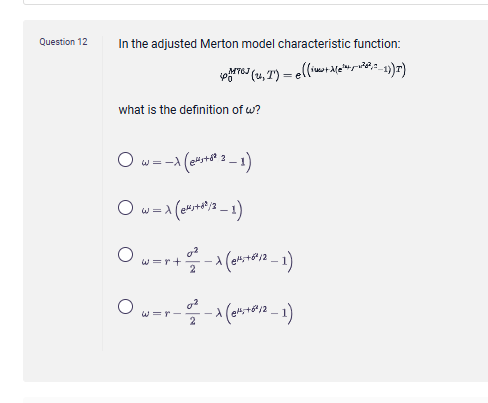

### **Question Analysis:**
The question asks for the definition of $ \omega $ in the adjusted Merton model characteristic function. The given characteristic function is:

$$
\varphi^{M76J}_0(u, T) = e^{\left( \left( i u \omega + \lambda \left( e^{i u \mu_j - u^2 \delta^2/2} - 1 \right) \right) T \right)}
$$

We need to identify the correct expression for $ \omega $ based on the context of the Merton (1976) jump-diffusion model.

---

### **Step 1: Recall the Adjusted Merton Model**
The Merton (1976) model combines geometric Brownian motion with jumps. The drift adjustment term $ \omega $ accounts for the impact of jumps on the expected return of the underlying asset. The formula for $ \omega $ is derived to ensure that the expected value of the asset price remains consistent with the risk-neutral framework.

The general form of $ \omega $ in the adjusted Merton model is:

$$
\omega = r - \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$

Where:
- $ r $: Risk-free rate.
- $ \sigma $: Volatility of the underlying asset.
- $ \lambda $: Jump intensity.
- $ \mu_j $: Expected jump size.
- $ \delta $: Standard deviation of the jump size.

However, in the **adjusted Merton model**, the diffusion component ($ r - \frac{\sigma^2}{2} $) is often omitted because the focus is solely on the jump component. Thus, the simplified form of $ \omega $ becomes:

$$
\omega = -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$

---

### **Step 2: Analyze Each Option**

#### **Option A:**
$$
\omega = -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This matches the simplified form of $ \omega $ in the adjusted Merton model, where only the jump component is considered.
- **This is correct.**

#### **Option B:**
$$
\omega = \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option has the wrong sign for $ \lambda $. The correct expression should have a negative sign.
- **This is incorrect.**

#### **Option C:**
$$
\omega = r + \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option includes the diffusion term ($ r + \frac{\sigma^2}{2} $), which is not part of the adjusted Merton model. The adjusted model focuses only on the jump component.
- **This is incorrect.**

#### **Option D:**
$$
\omega = r - \frac{\sigma^2}{2} - \lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$
- This option includes the full drift adjustment term ($ r - \frac{\sigma^2}{2} $), which is not part of the adjusted Merton model. The adjusted model focuses only on the jump component.
- **This is incorrect.**

---

### **Step 3: Conclusion**
The correct definition of $ \omega $ in the adjusted Merton model is:

$$
\omega = -\lambda \left( e^{\mu_j + \delta^2/2} - 1 \right)
$$

---

### **Final Answer:**
$$
\boxed{\text{A}}
$$

## Question 13

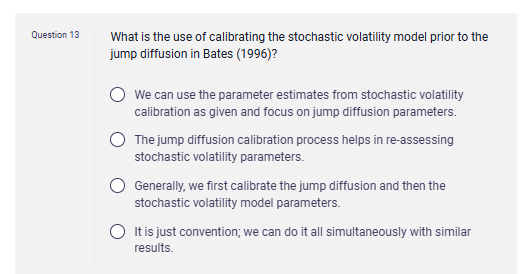

### **Question Analysis:**
The question asks about the purpose of calibrating the **stochastic volatility model** before calibrating the **jump diffusion component** in the Bates (1996) model. To answer this, we need to understand the sequential calibration process used in the Bates model and why it is structured this way.

---

### **Step 1: Understanding the Bates (1996) Model**
The Bates (1996) model combines:
1. **Stochastic Volatility (Heston Model)**: Captures the time-varying volatility of the underlying asset.
2. **Jump Diffusion (Merton Model)**: Incorporates sudden jumps in the asset price.

The characteristic function of the Bates model is the product of the characteristic functions of the Heston and Merton components:

$$
\varphi^{B96}_0(u, T) = \varphi^{H93}_0(u, T) \cdot \varphi^{M76J}_0(u, T)
$$

Where:
- $ \varphi^{H93}_0(u, T) $: Characteristic function for stochastic volatility (Heston).
- $ \varphi^{M76J}_0(u, T) $: Characteristic function for jump diffusion (Merton).

---

### **Step 2: Sequential Calibration Process**
The Bates model is typically calibrated in a **sequential manner**:
1. **Calibrate Stochastic Volatility (Heston Component)**:
   - Focus on parameters related to stochastic volatility ($ \kappa_v $, $ \theta_v $, $ \sigma_v $, $ \rho $, $ v_0 $).
   - Use market data (e.g., near-the-money options) to estimate these parameters.

2. **Calibrate Jump Diffusion (Merton Component)**:
   - Fix the stochastic volatility parameters obtained from the first step.
   - Focus on parameters related to jump diffusion ($ \lambda $, $ \mu $, $ \delta $).
   - Use market data (e.g., out-of-the-money options) to estimate these parameters.

3. **Full Calibration**:
   - Combine both sets of parameters and perform a final calibration to refine all parameters simultaneously.

---

### **Step 3: Why Calibrate Stochastic Volatility First?**
The primary reason for calibrating the stochastic volatility component first is to:
1. **Simplify the Calibration Process**:
   - By fixing the stochastic volatility parameters, the calibration of the jump diffusion component becomes more manageable.
   - This reduces the dimensionality of the optimization problem, making it easier to find stable parameter estimates.

2. **Focus on Different Market Features**:
   - Stochastic volatility primarily affects the **volatility smile**, especially for at-the-money and near-the-money options.
   - Jump diffusion primarily affects the **tails of the distribution**, impacting deep out-of-the-money options.
   - By separating the calibration into two steps, each component can be tuned to its respective market features.

3. **Avoid Overfitting**:
   - Simultaneously calibrating all parameters can lead to overfitting or unstable solutions due to the high dimensionality of the parameter space.
   - A sequential approach helps ensure that each component is well-calibrated before combining them.

---

### **Step 4: Analyze the Options**

#### **Option A: "We can use the parameter estimates from stochastic volatility calibration as given and focus on jump diffusion parameters."**
- This option correctly describes the sequential calibration process. The stochastic volatility parameters are estimated first and then fixed during the jump diffusion calibration.
- **This is correct.**

#### **Option B: "The jump diffusion calibration process helps in re-assessing stochastic volatility parameters."**
- This is incorrect. The jump diffusion calibration does not re-assess the stochastic volatility parameters; instead, it uses the fixed values obtained from the stochastic volatility calibration.

#### **Option C: "Generally, we first calibrate the jump diffusion and then the stochastic volatility model parameters."**
- This is incorrect. The standard procedure is to calibrate stochastic volatility first, followed by jump diffusion.

#### **Option D: "It is just convention; we can do it all simultaneously with similar results."**
- This is incorrect. While simultaneous calibration is possible, it is generally avoided due to the increased complexity and risk of overfitting. The sequential approach is preferred for stability and accuracy.

---

### **Step 5: Conclusion**
The correct answer is **Option A**: "We can use the parameter estimates from stochastic volatility calibration as given and focus on jump diffusion parameters."

---

### **Final Answer:**
$$
\boxed{\text{A}}
$$

## Question  14

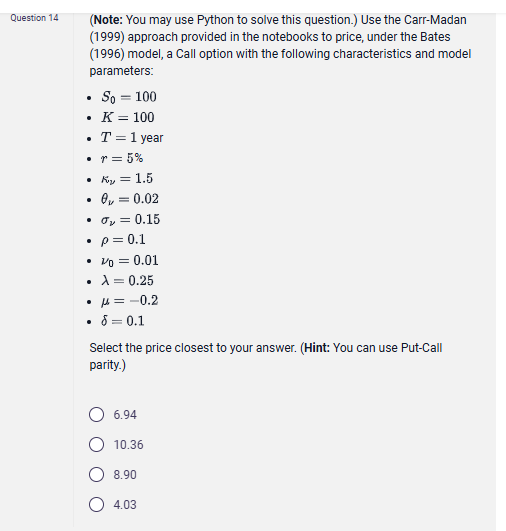

In [27]:
def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue

def B96_put_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price


# General Parameters
S0 = 100
K = 100
T = 1
r = 0.05

# Heston'93 Parameters
kappa_v = 1.5
theta_v = 0.02
sigma_v = 0.15
rho = 0.1
v0 = 0.01

# Merton'76 Parameters
lamb = 0.25
mu = -0.2
delta = 0.1
sigma = np.sqrt(v0)

put_price = B96_put_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

print(f"Put price under FFT Approach: {put_price: .2}")


Put price under FFT Approach:  4.0


In [28]:
B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

np.float64(8.90471882108109)

B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

## Quesiton 15 & 16

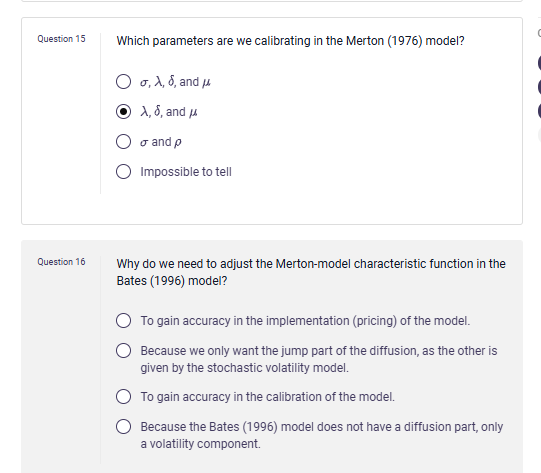

### **Question 15: Which parameters are we calibrating in the Merton (1976) model?**

#### **Analysis:**
The Merton (1976) model is a jump-diffusion model that combines geometric Brownian motion with jumps. The key parameters of the Merton model include:
- $ \sigma $: Volatility of the underlying asset.
- $ \lambda $: Jump intensity (rate of occurrence of jumps).
- $ \delta $: Standard deviation of the jump size.
- $ \mu $: Expected jump size.

During calibration, the goal is to estimate these parameters so that the model's predictions match observed market data (e.g., option prices). The diffusion component ($ \sigma $) is typically calibrated first, followed by the jump components ($ \lambda $, $ \delta $, and $ \mu $).

#### **Options:**
1. **$ \sigma, \lambda, \delta, $ and $ \mu $**:
   - This option includes all the key parameters of the Merton model. It is correct because during calibration, we estimate both the diffusion parameter ($ \sigma $) and the jump parameters ($ \lambda $, $ \delta $, and $ \mu $).

2. **$ \lambda, \delta, $ and $ \mu $**:
   - This option excludes $ \sigma $, which is part of the diffusion component of the Merton model. While the jump parameters are calibrated, excluding $ \sigma $ makes this option incomplete.

3. **$ \sigma $ and $ \rho $**:
   - This option only includes $ \sigma $ (volatility) and $ \rho $ (correlation), which is incorrect because $ \rho $ is not a parameter of the Merton model. Additionally, it excludes the jump parameters ($ \lambda $, $ \delta $, and $ \mu $).

4. **Impossible to tell**:
   - This option suggests uncertainty, but based on the context of model calibration, it is clear that the parameters being calibrated are $ \sigma, \lambda, \delta, $ and $ \mu $.

#### **Correct Answer:**
$$
\boxed{\text{σ, λ, δ, and μ}}
$$

---

### **Question 16: Why do we need to adjust the Merton-model characteristic function in the Bates (1996) model?**

#### **Analysis:**
The Bates (1996) model combines stochastic volatility (from the Heston model) with jumps (from the Merton model). To implement the Bates model, we need to adjust the characteristic function of the Merton model because:
1. **Focus on Jumps Only**: In the Bates model, the stochastic volatility component is already handled by the Heston model. Therefore, when incorporating the Merton model, we only need the **jump component** of the Merton model, not the full diffusion-and-jump process.
2. **Separation of Components**: By adjusting the Merton model's characteristic function, we ensure that the jump component is correctly integrated with the stochastic volatility component from the Heston model.

#### **Options:**
1. **To gain accuracy in the implementation (pricing) of the model.**
   - While this is true in general, it does not specifically address why we adjust the Merton model's characteristic function in the context of the Bates model.

2. **Because we only want the jump part of the diffusion, as the other is given by the stochastic volatility model.**
   - This is the correct reason. The Bates model already incorporates stochastic volatility through the Heston model, so we only need the jump component from the Merton model.

3. **To gain accuracy in the calibration of the model.**
   - Calibration accuracy is important, but this option does not explain why we adjust the Merton model's characteristic function.

4. **Because the Bates (1996) model does not have a diffusion part, only a volatility component.**
   - This is incorrect. The Bates model includes both stochastic volatility (diffusion) and jumps.

#### **Correct Answer:**
$$
\boxed{\text{Because we only want the jump part of the diffusion, as the other is given by the stochastic volatility model.}}
$$

# Usual Exam

## Question 1

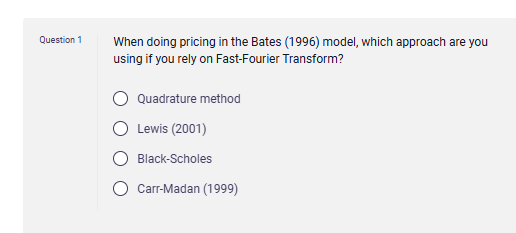

### **Question Analysis:**
The question asks which approach is used when pricing the Bates (1996) model using the Fast Fourier Transform (FFT). The options provided are:
1. **Quadrature method**
2. **Lewis (2001)**
3. **Black-Scholes**
4. **Carr-Madan (1999)**

To answer this, let’s analyze each option in the context of FFT-based pricing for the Bates (1996) model.

---

### **Step 1: Understanding FFT-Based Pricing**
The Fast Fourier Transform (FFT) is a numerical technique used to efficiently compute integrals that arise in Fourier-based option pricing methods. Two prominent Fourier-based approaches for pricing options are:
1. **Lewis (2001)**: Uses a specific integral formula to price options based on the characteristic function of the underlying asset's log-return process.
2. **Carr-Madan (1999)**: Also uses the characteristic function but employs a different integral formula that is more amenable to FFT implementation.

The key difference between these two approaches is the form of the integral and how it is discretized for numerical computation:
- **Lewis (2001)**: Involves a complex integral over the real line, which can be approximated using quadrature methods.
- **Carr-Madan (1999)**: Uses a simpler integral form that can be directly transformed into a discrete sum, making it ideal for FFT implementation.

---

### **Step 2: Analyze Each Option**

#### **Option A: "Quadrature method"**
- The quadrature method is a general numerical integration technique used to approximate integrals. While it can be applied to Lewis (2001), it is not specifically tied to FFT-based pricing.
- **This is incorrect.**

#### **Option B: "Lewis (2001)"**
- The Lewis (2001) approach involves a complex integral that is typically evaluated using quadrature methods rather than FFT. While it is a Fourier-based method, it is not optimized for FFT implementation.
- **This is incorrect.**

#### **Option C: "Black-Scholes"**
- The Black-Scholes model does not use FFT or Fourier-based methods. It is a closed-form solution for European options under geometric Brownian motion.
- **This is incorrect.**

#### **Option D: "Carr-Madan (1999)"**
- The Carr-Madan (1999) approach is specifically designed for FFT-based pricing. It reformulates the option pricing problem into a form that can be efficiently computed using FFT. This makes it the preferred choice for FFT-based implementations of models like Bates (1996).
- **This is correct.**

---

### **Step 3: Conclusion**
When pricing the Bates (1996) model using the Fast Fourier Transform (FFT), the approach used is the **Carr-Madan (1999)** method. This is because Carr-Madan (1999) provides an integral formulation that is well-suited for FFT implementation.

---

### **Final Answer:**
$$
\boxed{\text{Carr-Madan (1999)}}
$$

## Question 2

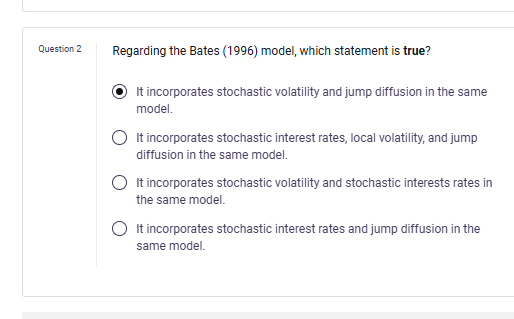

### **Question Analysis:**
The question asks which statement is true regarding the Bates (1996) model. The options provided are:

1. **It incorporates stochastic volatility and jump diffusion in the same model.**
2. **It incorporates stochastic interest rates, local volatility, and jump diffusion in the same model.**
3. **It incorporates stochastic volatility and stochastic interest rates in the same model.**
4. **It incorporates stochastic interest rates and jump diffusion in the same model.**

To answer this, we need to recall the key features of the Bates (1996) model.

---

### **Step 1: Understanding the Bates (1996) Model**
The Bates (1996) model is a combination of:
1. **Stochastic Volatility**: This component is based on the Heston (1993) model, where the variance of the underlying asset follows a mean-reverting process.
2. **Jump Diffusion**: This component is based on the Merton (1976) model, where the asset price experiences random jumps in addition to continuous diffusion.

Thus, the Bates (1996) model integrates both stochastic volatility and jump diffusion into a single framework.

---

### **Step 2: Analyze Each Option**

#### **Option A: "It incorporates stochastic volatility and jump diffusion in the same model."**
- This option correctly describes the Bates (1996) model. The model combines the stochastic volatility from the Heston model with the jump diffusion from the Merton model.
- **This is correct.**

#### **Option B: "It incorporates stochastic interest rates, local volatility, and jump diffusion in the same model."**
- The Bates (1996) model does not include stochastic interest rates or local volatility. It focuses on stochastic volatility and jump diffusion.
- **This is incorrect.**

#### **Option C: "It incorporates stochastic volatility and stochastic interest rates in the same model."**
- The Bates (1996) model does not include stochastic interest rates. It only incorporates stochastic volatility and jump diffusion.
- **This is incorrect.**

#### **Option D: "It incorporates stochastic interest rates and jump diffusion in the same model."**
- The Bates (1996) model does not include stochastic interest rates. It focuses on stochastic volatility and jump diffusion.
- **This is incorrect.**

---

### **Step 3: Conclusion**
The correct statement about the Bates (1996) model is that it incorporates **stochastic volatility and jump diffusion in the same model**.

---

### **Final Answer:**
$$
\boxed{\text{It incorporates stochastic volatility and jump diffusion in the same model.}}
$$

## Quesiton 3

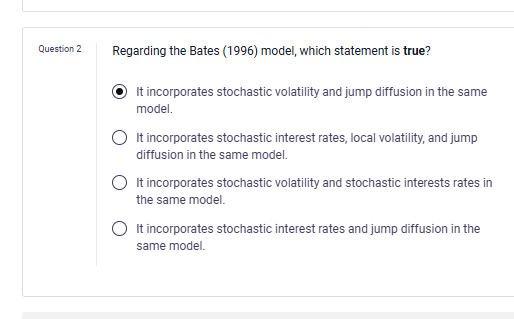

In [29]:
import numpy as np
from scipy.integrate import quad
# Characteristic functions
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Integral part
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value


def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)

S0 = 305.39
K = 305
T = 5/365
r = 0.08
sigma = 0.65
lamb = 2
mu = -0.05
delta = 0.75

put_price = M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Put Option Price under Lewis approcah: {put_price: .2f}")

Put Option Price under Lewis approcah:  11.50


In [30]:
import numpy as np
from scipy.integrate import quad

# Define the characteristic function for the Merton (1976) model
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """
    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Define the integration function for the Lewis (2001) approach
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the Put option price using Put-Call Parity
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Given parameters
S0 = 305.39
K = 305
T = 5 / 365  # Convert days to years
r = 0.08
sigma = 0.65
lamb = 2
mu = -0.05
delta = 0.75

# Compute the Put option price
put_price = M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Put option price: {put_price:.2f}")

Put option price: 11.50


## Question 4

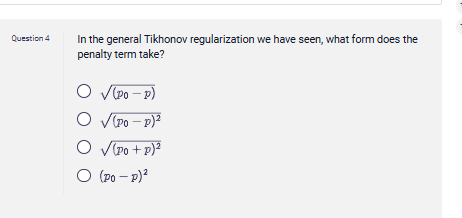

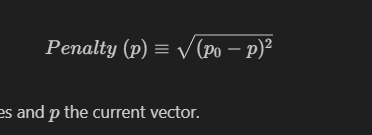

## Question 5

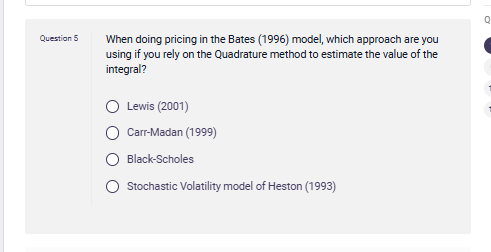

### **Question Analysis:**
The question asks which approach is used when pricing the Bates (1996) model if you rely on the **Quadrature method** to estimate the value of the integral. The options provided are:
1. **Lewis (2001)**
2. **Carr-Madan (1999)**
3. **Black-Scholes**
4. **Stochastic Volatility model of Heston (1993)**

To answer this, let’s analyze each option in the context of the Bates (1996) model and the Quadrature method.

---

### **Step 1: Understanding the Quadrature Method**
The Quadrature method is a numerical integration technique used to approximate definite integrals. In the context of option pricing, it is often used to evaluate integrals that arise in Fourier-based pricing methods. The key Fourier-based approaches for pricing options under stochastic models include:
- **Lewis (2001)**: Uses a specific integral formula to price options based on the characteristic function of the underlying asset's log-return process.
- **Carr-Madan (1999)**: Also uses the characteristic function but employs a different integral formula that is more amenable to FFT implementation.

Both Lewis (2001) and Carr-Madan (1999) involve integrals that can be approximated using numerical methods like Quadrature.

---

### **Step 2: Analyze Each Option**

#### **Option A: "Lewis (2001)"**
- The Lewis (2001) approach involves the following integral for pricing a Call option:
  $$
  C_0 = S_0 - \frac{\sqrt{S_0 K} e^{-rT}}{\pi} \int_{0}^{\infty} \mathbf{Re}[e^{izk} \varphi(z-i/2)] \frac{dz}{z^2+1/4}
  $$
- This integral can be evaluated numerically using Quadrature methods.
- **This is a valid option.**

#### **Option B: "Carr-Madan (1999)"**
- The Carr-Madan (1999) approach uses a similar integral but is typically implemented using the Fast Fourier Transform (FFT) rather than Quadrature. However, Quadrature can still be used as an alternative numerical method.
- While Carr-Madan (1999) is related to numerical integration, it is more commonly associated with FFT, not Quadrature.
- **This is less likely to be the correct answer.**

#### **Option C: "Black-Scholes"**
- The Black-Scholes model does not use Fourier-based methods or integrals. It provides a closed-form solution for European options under geometric Brownian motion.
- **This is incorrect.**

#### **Option D: "Stochastic Volatility model of Heston (1993)"**
- The Heston (1993) model is a stochastic volatility model, but it does not directly relate to the Quadrature method for pricing under the Bates (1996) model.
- **This is incorrect.**

---

### **Step 3: Conclusion**
The correct approach when relying on the Quadrature method to estimate the value of the integral in the Bates (1996) model is the **Lewis (2001) approach**. The Lewis (2001) formula explicitly involves an integral that can be approximated using Quadrature methods.

---

### **Final Answer:**
$$
\boxed{\text{Lewis (2001)}}
$$

## Question 6

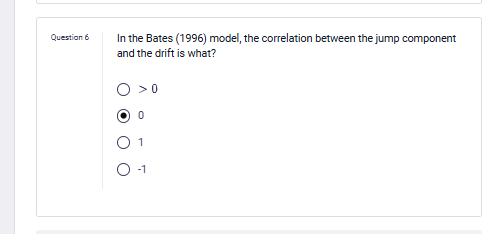
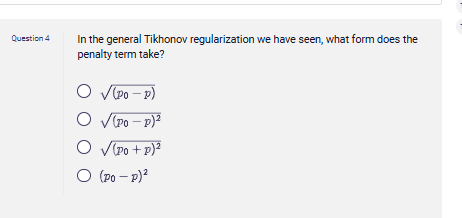

### **Question Analysis:**
The question asks about the correlation between the **jump component** and the **drift** in the Bates (1996) model. To answer this, let’s break down the key components of the Bates (1996) model:

---

### **Step 1: Understanding the Bates (1996) Model**
The Bates (1996) model combines:
1. **Stochastic Volatility (Heston Model)**: This component introduces time-varying volatility.
2. **Jump Diffusion (Merton Model)**: This component introduces sudden jumps in the asset price.

The Bates model is a combination of these two models, where:
- The **stochastic volatility component** affects the diffusion part of the asset price dynamics.
- The **jump component** introduces discrete jumps that are independent of the diffusion process.

---

### **Step 2: Correlation Between Jump Component and Drift**
In the Bates (1996) model:
- The **drift** term represents the expected return of the underlying asset, which is influenced by the risk-free rate $ r $ and adjusted for the impact of jumps.
- The **jump component** is modeled as random shocks that occur independently of the drift term.

#### Key Points:
1. **Independence of Jumps and Drift**:
   - The jumps in the Bates model are assumed to be **independent** of the drift term. This independence ensures that the jump component does not correlate with the continuous drift or diffusion process.
   - Mathematically, the characteristic function of the Bates model separates the stochastic volatility and jump components, indicating no direct correlation between them.

2. **Correlation Value**:
   - Since the jump component is independent of the drift, the correlation between the jump component and the drift is **zero**.

---

### **Step 3: Analyze the Options**

#### **Option A: "$ > 0 $"**
- This option suggests a positive correlation between the jump component and the drift. However, the Bates model assumes independence, so this is incorrect.

#### **Option B: "$ 0 $"**
- This option correctly states that the correlation is zero, reflecting the independence assumption in the Bates model.
- **This is correct.**

#### **Option C: "$ 1 $"**
- This option suggests a perfect positive correlation, which contradicts the independence assumption in the Bates model.
- **This is incorrect.**

#### **Option D: "$ -1 $"**
- This option suggests a perfect negative correlation, which also contradicts the independence assumption.
- **This is incorrect.**

---

### **Step 4: Conclusion**
The correct answer is that the correlation between the jump component and the drift in the Bates (1996) model is **zero**.

---

### **Final Answer:**
$$
\boxed{0}
$$

## Quesiton 7

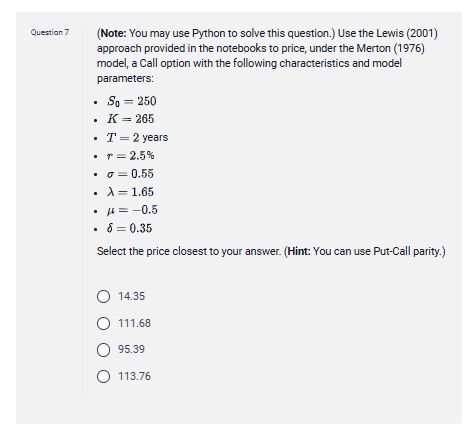

In [31]:
import numpy as np
from scipy.integrate import quad
# Characteristic functions
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Integral part
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value


def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

S0 = 250
K = 265
T = 2
r = 0.025
sigma = 0.55
lamb = 1.65
mu = -0.5
delta = 0.35

call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)

print(f"Call value under lewis approach: {call_price: .2f}")

Call value under lewis approach:  111.69


In [32]:
import numpy as np
from scipy.integrate import quad

# Define the characteristic function for the Merton (1976) model
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """
    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Define the integration function for the Lewis (2001) approach
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Given parameters
S0 = 250
K = 265
T = 2
r = 0.025
sigma = 0.55
lamb = 1.65
mu = -0.5
delta = 0.35

# Compute the Call option price
call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Call option price: {call_price:.2f}")

Call option price: 111.69


## Quesiton  8

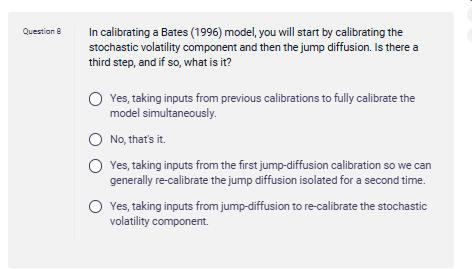

### **Question Analysis:**
The question asks about the calibration process of the Bates (1996) model. Specifically, it focuses on whether there is a **third step** in the calibration process after calibrating the stochastic volatility component and the jump diffusion component. The options provided are:

1. **Yes, taking inputs from previous calibrations to fully calibrate the model simultaneously.**
2. **No, that's it.**
3. **Yes, taking inputs from the first jump-diffusion calibration so we can generally re-calibrate the jump diffusion isolated for a second time.**
4. **Yes, taking inputs from jump-diffusion to re-calibrate the stochastic volatility component.**

To answer this, let’s analyze the calibration process of the Bates (1996) model based on the knowledge provided.

---

### **Step 1: Understanding the Calibration Process of the Bates (1996) Model**
The Bates (1996) model combines:
1. **Stochastic Volatility (Heston Model)**: Captures the time-varying volatility of the underlying asset.
2. **Jump Diffusion (Merton Model)**: Incorporates sudden jumps in the asset price.

The calibration process typically follows these steps:
1. **Calibrate Stochastic Volatility (Heston Component)**:
   - Focus on parameters related to stochastic volatility ($ \kappa_v $, $ \theta_v $, $ \sigma_v $, $ \rho $, $ v_0 $).
   - Use market data (e.g., near-the-money options) to estimate these parameters.

2. **Calibrate Jump Diffusion (Merton Component)**:
   - Fix the stochastic volatility parameters obtained from the first step.
   - Focus on parameters related to jump diffusion ($ \lambda $, $ \mu $, $ \delta $).
   - Use market data (e.g., out-of-the-money options) to estimate these parameters.

3. **Full Calibration**:
   - Combine both sets of parameters and perform a final calibration to refine all parameters simultaneously.
   - This step ensures that the model fits the entire range of market data accurately.

---

### **Step 2: Analyze Each Option**

#### **Option A: "Yes, taking inputs from previous calibrations to fully calibrate the model simultaneously."**
- This option correctly describes the third step in the calibration process. After calibrating the stochastic volatility and jump diffusion components separately, the final step involves combining both sets of parameters and performing a full calibration to refine all parameters simultaneously.
- **This is correct.**

#### **Option B: "No, that's it."**
- This option suggests that there is no third step, which is incorrect. The Bates (1996) model typically involves a third step of full calibration to ensure all parameters are optimized together.
- **This is incorrect.**

#### **Option C: "Yes, taking inputs from the first jump-diffusion calibration so we can generally re-calibrate the jump diffusion isolated for a second time."**
- This option incorrectly suggests re-calibrating the jump diffusion component a second time. In practice, the jump diffusion component is calibrated once, and the focus shifts to full calibration in the third step.
- **This is incorrect.**

#### **Option D: "Yes, taking inputs from jump-diffusion to re-calibrate the stochastic volatility component."**
- This option incorrectly suggests re-calibrating the stochastic volatility component using the jump diffusion parameters. In reality, the stochastic volatility component is calibrated first, and its parameters are fixed during the jump diffusion calibration.
- **This is incorrect.**

---

### **Step 3: Conclusion**
The correct answer is that there is a third step in the calibration process, which involves taking inputs from previous calibrations to fully calibrate the model simultaneously.

---

### **Final Answer:**
$$
\boxed{\text{Yes, taking inputs from previous calibrations to fully calibrate the model simultaneously.}}
$$

## Question  9

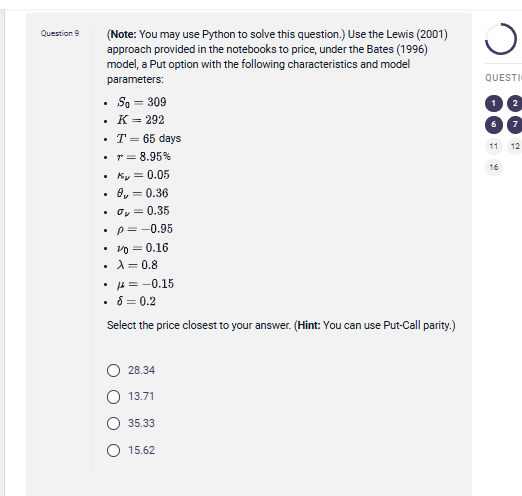

In [33]:
## Characteristic fucntion

def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    Parameter definitions see function BCC_call_value."""
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """

    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral value for Bates (1996) characteristic function
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value


def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Valuation of European call option in B96 Model via Lewis (2001)
    Parameters:
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    kappa_v: float
        mean-reversion factor
    theta_v: float
        long-run mean of variance
    sigma_v: float
        volatility of variance
    rho: float
        correlation between variance and stock/index level
    v0: float
        initial level of variance
    lamb: float
        jump intensity
    mu: float
        expected jump size
    delta: float
        standard deviation of jump
    ==========
    """
    int_value = quad(
        lambda u: B96_int_func(
            u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
        ),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

def B96_Put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price


# General Parameters
S0 = 309
K = 292
T = 65/365
r = 0.0895

# Heston'93 Parameters
kappa_v = 0.05
theta_v = 0.36
sigma_v = 0.35
rho = -0.95
v0 = 0.16

# Merton'76 Parameters
lamb = 0.8
mu = -0.15
delta = 0.2
sigma = np.sqrt(v0)

put_price = B96_Put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

print(f"Put price: {put_price:.2f}")

Put price: 13.72


In [34]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Lewis (2001) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Bates (1996) characteristic function
    """
    char_func = B96_char_func(u - 0.5 * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Bates (1996) model
    """
    int_value = quad(
        lambda u: B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the Put option price using Put-Call Parity
def B96_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    call_price = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Given parameters
S0 = 309
K = 292
T = 65 / 365  # Convert days to years
r = 0.0895
kappa_v = 0.05
theta_v = 0.36
sigma_v = 0.15
rho = -0.95
v0 = 0.16
lamb = 0.8
mu = -0.15
delta = 0.2

# Compute the Put option price
put_price = B96_put_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Put option price: {put_price:.2f}")

Put option price: 13.47


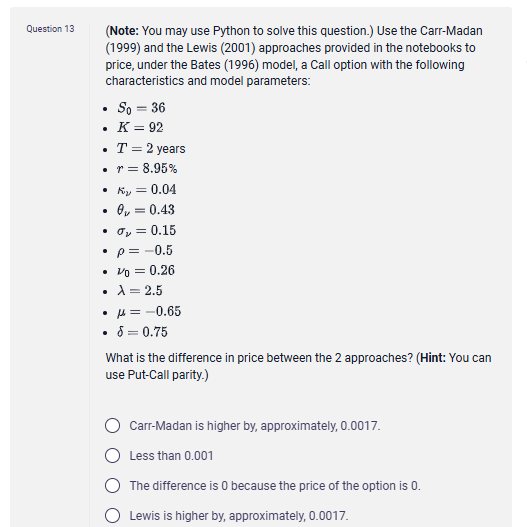

In [57]:
# lewish  approach 
# Given parameters
S0 = 36
K = 92
T = 165/365
r = 0.0895
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26
lamb = 2.5
mu = -0.65
delta = 0.75
sigma = np.sqrt(v0)


# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Lewis (2001) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Bates (1996) characteristic function
    """
    char_func = B96_char_func(u - 0.5 * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Bates (1996) model
    """
    int_value = quad(
        lambda u: B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

call_price_lewis = B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)


# Carr Madan 

def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue





call_price_CM = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)




In [58]:
print(f'Lewis : {call_price_lewis: }, CM: {call_price_CM:}')

Lewis :  2.013426508401693, CM: 2.013427050011289


In [59]:
call_price_lewis - call_price_CM

np.float64(-5.416095958388212e-07)

In [38]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Lewis (2001) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Bates (1996) characteristic function
    """
    char_func = B96_char_func(u - 0.5 * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function using Lewis (2001)
def B96_call_value_lewis(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Bates (1996) model
    """
    int_value = quad(
        lambda u: B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the Carr-Madan (1999) approach
def B96_call_value_carr_madan(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Value of the Call option under Carr-Madan (1999) for Bates (1996) model
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 36
K = 92
T = 2
r = 0.0895
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26
lamb = 2.5
mu = -0.65
delta = 0.75

# Compute the Call option price using Lewis (2001)
call_price_lewis = B96_call_value_lewis(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

# Compute the Call option price using Carr-Madan (1999)
call_price_carr_madan = B96_call_value_carr_madan(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

# Compute the difference in prices
price_difference = call_price_carr_madan - call_price_lewis
print(f"Call price using Lewis (2001): {call_price_lewis:.6f}")
print(f"Call price using Carr-Madan (1999): {call_price_carr_madan:.6f}")
print(f"Difference in prices: {price_difference:.6f}")

Call price using Lewis (2001): 16.740193
Call price using Carr-Madan (1999): -0.251385
Difference in prices: -16.991577


## Quesiton  15

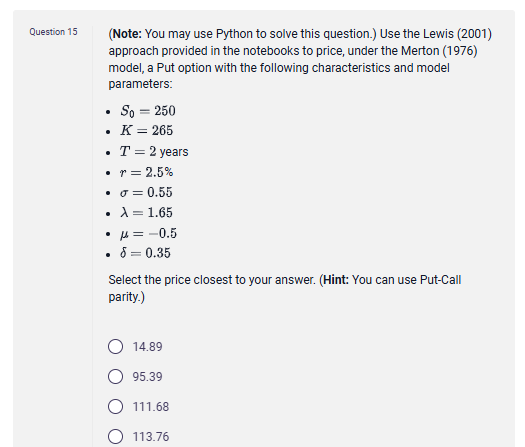

In [39]:
import numpy as np
from scipy.integrate import quad
# Characteristic functions
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Integral part
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value


def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

In [40]:
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)

S0 = 250
K = 265
T = 2
r = 0.025
sigma = 0.55
lamb = 1.65
mu = -0.5
delta = 0.35

In [41]:
put_price = M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Put Option Price under Lewis approcah: {put_price: .2f}")

Put Option Price under Lewis approcah:  113.76


In [42]:
import numpy as np
from scipy.integrate import quad

# Define the Merton (1976) characteristic function
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """
    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Define the integration function for the Lewis (2001) approach
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the Put option price using Put-Call Parity
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return put_price

# Given parameters
S0 = 250
K = 265
T = 2
r = 0.025
sigma = 0.55
lamb = 1.65
mu = -0.5
delta = 0.35

# Compute the Put option price
put_price = M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)
print(f"Put option price: {put_price:.2f}")

Put option price: 113.76


# Faith

In [43]:
# Carr Madan 

def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue



# General Parameters
S0 = 10.65
K = 22
T = 5/365
r = 0
kappa_v = 0.85
theta_v = 0.16
sigma_v = 0.15
rho = -0.95
v0 = 0.016
lamb = 0.1
mu = -0.05
delta = 0.9
sigma = np.sqrt(v0)

call_price_CM = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

call_price_CM

np.float64(0.004859437833860161)

In [44]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Carr-Madan (1996) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1996) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 10.65
K = 22
T = 5 / 365  # Convert days to years
r = 0.0
kappa_v = 0.85
theta_v = 0.16
sigma_v = 0.15
rho = -0.95
v0 = 0.016
lamb = 0.1
mu = -0.05
delta = 0.9

# Compute the Call option price using Carr-Madan (1996)
call_price = B96_integration_function(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call option price: {call_price:.2f}")

TypeError: B96_integration_function() missing 1 required positional argument: 'delta'

In [ ]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Carr-Madan (1996) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1996) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 10.65
K = 22
T = 5 / 365  # Convert days to years
r = 0.0
kappa_v = 0.85
theta_v = 0.16
sigma_v = 0.15
rho = -0.95
v0 = 0.016
lamb = 0.1
mu = -0.05
delta = 0.9
sigma = np.sqrt(v0)

# Compute the Call option price using Carr-Madan (1996)
call_price = B96_integration_function(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
print(f"Call option price: {call_price:.2f}")

TypeError: B96_integration_function() missing 1 required positional argument: 'delta'

In [64]:

# Carr Madan 

def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue



# General Parameters
S0 = 10.65
K = 22
T = 5 / 365  # Convert days to years
r = 0
kappa_v = 0.85
theta_v = 0.16
sigma_v = 0.15
rho = -0.95
v0 = 0.016
lamb = 0.1
mu = -0.05
delta = 0.9
sigma = np.sqrt(v0)


call_price = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

put_price_CM = call_price - S0 + K * np.exp(-r * T)

put_price_CM

np.float64(11.35485943783386)

In [46]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Carr-Madan (1996) approach
def B96_integration_function(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1996) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 309
K = 292
T = 165 / 365  # Convert days to years
r = 0.0895
kappa_v = 0.05
theta_v = 0.36
sigma_v = 0.35
rho = -0.95
v0 = 0.16
lamb = 0.8
mu = -0.15
delta = 0.2

# Compute the Call option price using Carr-Madan (1996)
call_price = B96_integration_function(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

# Use Put-Call Parity to compute the Put option price
put_price = call_price - S0 + K * np.exp(-r * T)
print(f"Put option price: {put_price:.2f}")

TypeError: B96_integration_function() missing 1 required positional argument: 'delta'

In [60]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (
        kappa_v - rho * sigma_v * u * 1j - c2
    )
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1))
        * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Lewis (2001) approach
def B96_integration_function_lewis(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Bates (1996) characteristic function
    """
    char_func = B96_char_func(u - 0.5 * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function using Lewis (2001)
def B96_call_value_lewis(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Bates (1996) model
    """
    int_value = quad(
        lambda u: B96_integration_function_lewis(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Define the integration function for the Carr-Madan (1999) approach
def B96_integration_function_carr_madan(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1999) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 36
K = 92
T = 165 / 365  # Convert days to years
r = 0.0895
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26
lamb = 2.5
mu = -0.65
delta = 0.75

# Compute the Call option price using Lewis (2001)
call_price_lewis = B96_call_value_lewis(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

# Compute the Call option price using Carr-Madan (1999)
call_price_carr_madan = B96_integration_function_carr_madan(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

# Compute the difference in prices
price_difference = call_price_carr_madan - call_price_lewis
print(f"Call price using Lewis (2001): {call_price_lewis:.6f}")
print(f"Call price using Carr-Madan (1999): {call_price_carr_madan:.6f}")
print(f"Difference in prices: {price_difference:.6f}")

TypeError: B96_integration_function_carr_madan() missing 1 required positional argument: 'delta'

In [61]:
def B96_integration_function_carr_madan(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1999) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    vo = eta * (u - 1)  # u is passed as an integration variable

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

In [ ]:
# Given parameters
S0 = 36
K = 92
T = 165 / 365  # Convert days to years
r = 0.0895
kappa_v = 0.04
theta_v = 0.43
sigma_v = 0.15
rho = -0.5
v0 = 0.26
lamb = 2.5
mu = -0.65
delta = 0.75

u = B96_char_func()
B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
# Compute the Call option price using Lewis (2001)
call_price_lewis = B96_call_value_lewis(S0=S0, K=K, T=T, r=r, kappa_v=kappa_v, theta_v=theta_v, sigma_v=sigma_v, rho=rho, v0=v0, lamb=lamb, mu=mu, delta=delta)

# Compute the Call option price using Carr-Madan (1999)
call_price_carr_madan = B96_integration_function_carr_madan(S0=S0, K=K, T=T, r=r, kappa_v=kappa_v, theta_v=theta_v, sigma_v=sigma_v, rho=rho, v0=v0, lamb=lamb, mu=mu, delta=delta)

# Compute the difference in prices
price_difference = call_price_carr_madan - call_price_lewis
print(f"Call price using Lewis (2001): {call_price_lewis:.6f}")
print(f"Call price using Carr-Madan (1999): {call_price_carr_madan:.6f}")
print(f"Difference in prices: {price_difference:.6f}")

TypeError: B96_integration_function_carr_madan() missing 1 required positional argument: 'u'

In [65]:
import numpy as np
from scipy.integrate import quad

# -----------------------------
# 1. Heston (1993) Characteristic Function
# -----------------------------
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Heston (1993) characteristic function for stochastic volatility
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# -----------------------------
# 2. Merton Jump Component (Only Jump, not full Merton model)
# -----------------------------
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Merton '76 model characteristic function (only jump component)
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)) * T
    )
    return char_func_value

# -----------------------------
# 3. Bates (1996) Combined Characteristic Function
# -----------------------------
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function combining Heston and Merton jump components
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# -----------------------------
# 4. Lewis (2001) Integral Function for Bates (1996)
# -----------------------------
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral function for Bates (1996) model
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

# -----------------------------
# 5. Bates (1996) Call Option Pricing Function (Lewis 2001)
# -----------------------------
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) call option pricing via Lewis (2001) Fourier method
    Parameters:
    S0: initial stock/index level
    K: strike price
    T: time-to-maturity
    r: constant risk-free short rate
    kappa_v: mean-reversion factor for variance
    theta_v: long-run mean of variance
    sigma_v: volatility of variance
    rho: correlation between variance and stock/index level
    v0: initial level of variance
    lamb: jump intensity
    mu: expected jump size
    delta: standard deviation of jump
    """
    int_value = quad(
        lambda u: B96_int_func(u, S0=S0, K=K, T=T, r=r,
                               kappa_v=kappa_v, theta_v=theta_v,
                               sigma_v=sigma_v, rho=rho, v0=v0,
                               lamb=lamb, mu=mu, delta=delta),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# -----------------------------
# 6. Example Usage
# -----------------------------
# Define parameters
S0 = 100       # Initial stock price
K = 100        # Strike price
T = 1          # Time to maturity (in years)
r = 0.05       # Risk-free rate

# Heston Stochastic Volatility Parameters
kappa_v = 1.5  # Mean-reversion speed of variance
theta_v = 0.02 # Long-run mean of variance
sigma_v = 0.15 # Volatility of variance
rho = 0.1      # Correlation between asset and variance
v0 = 0.01      # Initial variance

# Merton Jump Parameters (Only jump component used in Bates model)
lamb = 0.25    # Jump intensity
mu = -0.2       # Expected jump size
delta = 0.1     # Standard deviation of jump

# Call the Bates model pricing function
call_price = B96_call_value(
    S0=S0,
    K=K,
    T=T,
    r=r,
    kappa_v=kappa_v,
    theta_v=theta_v,
    sigma_v=sigma_v,
    rho=rho,
    v0=v0,
    lamb=lamb,
    mu=mu,
    delta=delta
)

# Print the result
print(f"Call option price under Bates (1996) model: ${call_price:.4f}")

Call option price under Bates (1996) model: $8.9047


In [66]:
call_price_lewis = B96_call_value_lewis(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)

In [68]:
call_price_lewis - call_price

np.float64(-1.4227490225948713e-06)

In [69]:
import numpy as np
from scipy.integrate import quad

# Define the Merton (1976) characteristic function
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """
    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Define the integration function for the Lewis (2001) approach
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Given parameters
S0 = 8.75
K = 10
T = 35 / 365  # Convert days to years
r = 0.0
sigma = 0.05
lamb = 2
mu = -0.05
delta = 0.1

# Compute the Call option price using Lewis (2001)
call_price = M76_call_value(S0=S0, K=K, T=T, r=r, sigma=sigma, lamb=lamb, mu=mu, delta=delta)
print(f"Call option price: {call_price:.4f}")

Call option price: 0.0055


# Cynthia Njau 

In [70]:
import numpy as np
from scipy.integrate import quad

# -----------------------------
# 1. Heston (1993) Characteristic Function
# -----------------------------
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Heston (1993) characteristic function for stochastic volatility
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# -----------------------------
# 2. Merton Jump Component (Only Jump, not full Merton model)
# -----------------------------
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Merton '76 model characteristic function (only jump component)
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)) * T
    )
    return char_func_value

# -----------------------------
# 3. Bates (1996) Combined Characteristic Function
# -----------------------------
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function combining Heston and Merton jump components
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# -----------------------------
# 4. Lewis (2001) Integral Function for Bates (1996)
# -----------------------------
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral function for Bates (1996) model
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

# -----------------------------
# 5. Bates (1996) Call Option Pricing Function (Lewis 2001)
# -----------------------------
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) call option pricing via Lewis (2001) Fourier method
    Parameters:
    S0: initial stock/index level
    K: strike price
    T: time-to-maturity
    r: constant risk-free short rate
    kappa_v: mean-reversion factor for variance
    theta_v: long-run mean of variance
    sigma_v: volatility of variance
    rho: correlation between variance and stock/index level
    v0: initial level of variance
    lamb: jump intensity
    mu: expected jump size
    delta: standard deviation of jump
    """
    int_value = quad(
        lambda u: B96_int_func(u, S0=S0, K=K, T=T, r=r,
                               kappa_v=kappa_v, theta_v=theta_v,
                               sigma_v=sigma_v, rho=rho, v0=v0,
                               lamb=lamb, mu=mu, delta=delta),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# -----------------------------
# 6. Example Usage
# -----------------------------
# Define parameters
S0 = 2247.5       # Initial stock price
K = 2250       # Strike price
T = 19/365          # Time to maturity (in years)
r = 0.025       # Risk-free rate

# Heston Stochastic Volatility Parameters
kappa_v = 1.85  # Mean-reversion speed of variance
theta_v = 0.06 # Long-run mean of variance
sigma_v = 0.45 # Volatility of variance
rho = -0.75      # Correlation between asset and variance
v0 = 0.21      # Initial variance

# Merton Jump Parameters (Only jump component used in Bates model)
lamb = 0.13    # Jump intensity
mu = -0.4       # Expected jump size
delta = 0.3     # Standard deviation of jump

# Call the Bates model pricing function
call_price = B96_call_value(
    S0=S0,
    K=K,
    T=T,
    r=r,
    kappa_v=kappa_v,
    theta_v=theta_v,
    sigma_v=sigma_v,
    rho=rho,
    v0=v0,
    lamb=lamb,
    mu=mu,
    delta=delta
)

# Print the result
print(f"Call option price under Bates (1996) model: ${call_price:.4f}")

Call option price under Bates (1996) model: $94.0732


In [71]:
import numpy as np
from scipy.integrate import quad

# Define the Merton (1976) characteristic function
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """
    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Define the integration function for the Lewis (2001) approach
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)
    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real
    return value

# Define the call option price function
def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """
    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value

# Given parameters
S0 = 305.39
K = 305
T = 5 / 365  # Convert days to years
r = 0.08
sigma = 0.65
lamb = 2
mu = -0.05
delta = 0.25

# Compute the Call option price using Lewis (2001)
call_price = M76_call_value(S0=S0, K=K, T=T, r=r, sigma=sigma, lamb=lamb, mu=mu, delta=delta)
print(f"Call option price: {call_price:.4f}")

Call option price: 10.2313


In [91]:
import numpy as np
from scipy.integrate import quad
# Characteristic functions
def M76_char_func(u, T, r, sigma, lamb, mu, delta):
    """
    Characteristic function for Merton '76 model
    """

    omega = r - 0.5 * sigma**2 - lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (
            1j * u * omega
            - 0.5 * u**2 * sigma**2
            + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)
        )
        * T
    )
    return char_func_value

# Integral part
def M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta):
    """
    Integral function for Lewis (2001) under Merton'76 characteristic function
    """
    char_func = M76_char_func(u - 0.5 * 1j, T, r, sigma, lamb, mu, delta)

    value = 1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func).real

    return value


def M76_call_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Call option under Lewis (2001) for Merton'76 jump diffusion model
    """

    int_value = quad(
        lambda u: M76_integration_function(u, S0, K, T, r, sigma, lamb, mu, delta),
        0,
        50,
        limit=250,
    )[0]

    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)

    return call_value

In [92]:
def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)



In [93]:
# Given parameters
S0 = 305.39
K = 305
T = 5 / 365  # Convert days to years
r = 0.08
sigma = 0.65
lamb = 2
mu = -0.05
delta = 0.75

# Compute the Call option price using Lewis (2001)
call_price = M76_call_value(S0=S0, K=K, T=T, r=r, sigma=sigma, lamb=lamb, mu=mu, delta=delta)
print(f"Call option price: {call_price:.4f}")

M76_put_value(S0=S0, K=K, T=T, r=r, sigma=sigma, lamb=lamb, mu=mu, delta=delta)

Call option price: 12.2199


np.float64(11.495862872964153)

In [81]:
# Given parameters
S0 = 1.35
K = 2
T = 90 / 365  # Convert days to years
r = 0.0075
sigma = 0.25
lamb = 1.85
mu = -0.045
delta = 0.15

def M76_put_value(S0, K, T, r, sigma, lamb, mu, delta):
    """
    Value of the Put option under Lewis (2001) using put-call parity.
    """
    call_price = M76_call_value(S0, K, T, r, sigma, lamb, mu, delta)
    put_price = call_price - S0 + K * np.exp(-r * T)
    return max(0, put_price)

M76_put_value(S0, K, T, r, sigma, lamb, mu, delta)

np.float64(0.6474023869096384)

In [86]:
# Carr Madan 

def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue



# Define parameters
S0 = 36      # Initial stock price
K = 92       # Strike price
T = 2         # Time to maturity (in years)
r = 0.0895      # Risk-free rate

# Heston Stochastic Volatility Parameters
kappa_v = 0.04  # Mean-reversion speed of variance
theta_v = 0.43 # Long-run mean of variance
sigma_v = 0.15 # Volatility of variance
rho = -0.5      # Correlation between asset and variance
v0 = 0.26     # Initial variance

# Merton Jump Parameters (Only jump component used in Bates model)
lamb = 2.5    # Jump intensity
mu = -0.65      # Expected jump size
delta = 0.75    # Standard deviation of jump


call_price_cm = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)



call_price

np.float64(16.74019282883021)

In [87]:
import numpy as np
from scipy.integrate import quad

# -----------------------------
# 1. Heston (1993) Characteristic Function
# -----------------------------
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Heston (1993) characteristic function for stochastic volatility
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# -----------------------------
# 2. Merton Jump Component (Only Jump, not full Merton model)
# -----------------------------
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Merton '76 model characteristic function (only jump component)
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)) * T
    )
    return char_func_value

# -----------------------------
# 3. Bates (1996) Combined Characteristic Function
# -----------------------------
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function combining Heston and Merton jump components
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# -----------------------------
# 4. Lewis (2001) Integral Function for Bates (1996)
# -----------------------------
def B96_int_func(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Lewis (2001) integral function for Bates (1996) model
    """
    char_func_value = B96_char_func(
        u - 1j * 0.5, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
    )
    int_func_value = (
        1 / (u**2 + 0.25) * (np.exp(1j * u * np.log(S0 / K)) * char_func_value).real
    )
    return int_func_value

# -----------------------------
# 5. Bates (1996) Call Option Pricing Function (Lewis 2001)
# -----------------------------
def B96_call_value(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) call option pricing via Lewis (2001) Fourier method
    Parameters:
    S0: initial stock/index level
    K: strike price
    T: time-to-maturity
    r: constant risk-free short rate
    kappa_v: mean-reversion factor for variance
    theta_v: long-run mean of variance
    sigma_v: volatility of variance
    rho: correlation between variance and stock/index level
    v0: initial level of variance
    lamb: jump intensity
    mu: expected jump size
    delta: standard deviation of jump
    """
    int_value = quad(
        lambda u: B96_int_func(u, S0=S0, K=K, T=T, r=r,
                               kappa_v=kappa_v, theta_v=theta_v,
                               sigma_v=sigma_v, rho=rho, v0=v0,
                               lamb=lamb, mu=mu, delta=delta),
        0,
        np.inf,
        limit=250,
    )[0]
    call_value = max(0, S0 - np.exp(-r * T) * np.sqrt(S0 * K) / np.pi * int_value)
    return call_value



# Call the Bates model pricing function
call_price_lewis = B96_call_value(
    S0=S0,
    K=K,
    T=T,
    r=r,
    kappa_v=kappa_v,
    theta_v=theta_v,
    sigma_v=sigma_v,
    rho=rho,
    v0=v0,
    lamb=lamb,
    mu=mu,
    delta=delta
)

# Print the result
print(f"Call option price under Bates (1996) model: ${call_price:.4f}")

Call option price under Bates (1996) model: $16.7402


In [90]:
call_price_lewis -call_price_cm

np.float64(0.0017141111653060648)

In [89]:
call_price_cm

np.float64(16.738478717664904)

In [96]:
# Carr Madan 

def B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Call option price in Bates (1996) under FFT
    """

    k = np.log(K / S0)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )

    else:
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )

        v = (vo + 1j * alpha) - 1j

        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )

    # Numerical FFT Routine
    delt = np.zeros(N)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (
            np.exp(1j * b * vo) * (modcharFunc1 - modcharFunc2) * 0.5 * eta * SimpsonW
        )
        payoff = (np.fft.fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)

    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0

    return CallValue



# Given parameters
S0 = 2247.5
K = 2250
T = 190 / 365  # Convert days to years
r = 0.025
kappa_v = 1.85
theta_v = 0.06
sigma_v = 0.45
rho = -0.75
v0 = 0.21
lamb = 0.13
mu = -0.4
delta = 0.3


call_price_cm = B96_call_FFT(S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)





call_price_cm - S0 + K * np.exp(-r * T)

np.float64(248.98948622023795)

In [94]:
import numpy as np
from scipy.integrate import quad

# Define the Heston characteristic function
def H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0):
    """
    Valuation of European call option in H93 model via Lewis (2001)
    Fourier-based approach: characteristic function.
    """
    c1 = kappa_v * theta_v
    c2 = -np.sqrt(
        (rho * sigma_v * u * 1j - kappa_v) ** 2 - sigma_v**2 * (-u * 1j - u**2)
    )
    c3 = (kappa_v - rho * sigma_v * u * 1j + c2) / (kappa_v - rho * sigma_v * u * 1j - c2)
    H1 = r * u * 1j * T + (c1 / sigma_v**2) * (
        (kappa_v - rho * sigma_v * u * 1j + c2) * T
        - 2 * np.log((1 - c3 * np.exp(c2 * T)) / (1 - c3))
    )
    H2 = (
        (kappa_v - rho * sigma_v * u * 1j + c2)
        / sigma_v**2
        * ((1 - np.exp(c2 * T)) / (1 - c3 * np.exp(c2 * T)))
    )
    char_func_value = np.exp(H1 + H2 * v0)
    return char_func_value

# Define the Merton jump-diffusion characteristic function
def M76J_char_func(u, T, lamb, mu, delta):
    """
    Adjusted Characteristic function for Merton '76 model: Only jump component
    """
    omega = -lamb * (np.exp(mu + 0.5 * delta**2) - 1)
    char_func_value = np.exp(
        (1j * u * omega + lamb * (np.exp(1j * u * mu - u**2 * delta**2 * 0.5) - 1)) * T
    )
    return char_func_value

# Define the Bates (1996) characteristic function
def B96_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Bates (1996) characteristic function
    """
    H93 = H93_char_func(u, T, r, kappa_v, theta_v, sigma_v, rho, v0)
    M76J = M76J_char_func(u, T, lamb, mu, delta)
    return H93 * M76J

# Define the integration function for the Carr-Madan (1999) approach
def B96_integration_function_carr_madan(u, S0, K, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta):
    """
    Integral function for Carr-Madan (1999) under Bates (1996) characteristic function
    """
    alpha = 0.5  # Parameter for Carr-Madan
    k = np.log(S0 / K)
    g = 1  # Factor to increase accuracy
    N = g * 4096
    eps = (g * 150) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    vo = eta * (u - 1)

    # Modifications to ensure integrability
    if S0 >= 0.95 * K:  # ITM Case
        modcharFunc = np.exp(-r * T) * (
            B96_char_func(vo - (alpha + 1) * 1j, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta)
            / (alpha**2 + alpha - vo**2 + 1j * (2 * alpha + 1) * vo)
        )
    else:
        alpha = 1.1
        v1 = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo - 1j * alpha))
            - np.exp(r * T) / (1j * (vo - 1j * alpha))
            - B96_char_func(
                v1, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo - 1j * alpha) ** 2 - 1j * (vo - 1j * alpha))
        )
        v2 = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (
            1 / (1 + 1j * (vo + 1j * alpha))
            - np.exp(r * T) / (1j * (vo + 1j * alpha))
            - B96_char_func(
                v2, T, r, kappa_v, theta_v, sigma_v, rho, v0, lamb, mu, delta
            )
            / ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha))
        )
        modcharFunc = (modcharFunc1 - modcharFunc2) * 0.5

    FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta
    payoff = (np.fft.fft(FFTFunc)).real
    CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    return CallValue

# Given parameters
S0 = 2247.5
K = 2250
T = 190 / 365  # Convert days to years
r = 0.025
kappa_v = 1.85
theta_v = 0.06
sigma_v = 0.45
rho = -0.75
v0 = 0.21
lamb = 0.13
mu = -0.4
delta = 0.3

# Compute the Call option price using Carr-Madan (1999)
call_price = B96_integration_function_carr_madan(S0=S0, K=K, T=T, r=r,
                                                kappa_v=kappa_v, theta_v=theta_v,
                                                sigma_v=sigma_v, rho=rho, v0=v0,
                                                lamb=lamb, mu=mu, delta=delta)

# Use Put-Call Parity to compute the Put option price
put_price = call_price - S0 + K * np.exp(-r * T)
print(f"Put option price: {put_price:.2f}")

TypeError: B96_integration_function_carr_madan() missing 1 required positional argument: 'u'